In [2]:
import sqlalchemy as db
import pandas as pd
import os
import csv
import seaborn as sns
import matplotlib.pyplot as plt

## Connecting to database

In [3]:
# connecting to database sql_challenge created in postgresql
engine = db.create_engine('postgresql://localhost:5432/sql_challenge')
connection = engine.connect()
metadata = db.MetaData()

In [4]:
#to find all the tables for the database (it should be empty)
engine.table_names()

/var/folders/ld/_spx9cwj74z4zm921xp1zssh0000gn/T/ipykernel_39922/3558990862.py:2: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['titles', 'departments', 'employees', 'dept_emp', 'dept_manager', 'salaries']

# Creating Table
#### Use only one method from three methods below to create table otherwise it will give duplicate error
### 1.
#### Using postgresql or pgAdmin to create the table and insert the values there

### 2.

### Create tables using pandas to_sql ( cannot assign the foreign key by this method, need to use update method later to assign FK)
### Inserting data at the same time from csv files

In [ ]:
#For table titles
path_titles=os.path.join('data', 'titles.csv')

with open(path_titles, 'r') as tit:
    df_titles = pd.read_csv(tit)
df_titles.to_sql('titles', con=engine, index=False, if_exists='replace')


#For table departments
path_dept=os.path.join('data', 'departments.csv')

with open(path_dept, 'r') as dept:
    df_dept = pd.read_csv(dept)
df_dept.to_sql('departments', con=engine, index=False, if_exists='replace')

#For table employees
path_emp=os.path.join('data', 'employees.csv')

with open(path_emp, 'r') as emp:
    df_emp = pd.read_csv(emp)
df_emp.to_sql('employees', con=engine, index=False, if_exists='replace')


#For table dept_emp
path_dept_emp=os.path.join('data', 'dept_emp.csv')

with open(path_dept_emp, 'r') as dept_e:
    df_dept_emp = pd.read_csv(dept_e)
df_dept_emp.to_sql('dept_emp', con=engine, index=False, if_exists='replace')

#For table dept_manager
path_dept_manager=os.path.join('data', 'dept_manager.csv')

with open(path_dept_manager, 'r') as dept_man:
    df_dept_manager = pd.read_csv(dept_man)
df_dept_manager.to_sql('dept_manager', con=engine, index=False, if_exists='replace')

#For table salaries
path_salaries=os.path.join('data', 'salaries.csv')

with open(path_salaries, 'r') as sal:
    df_salaries = pd.read_csv(sal)
df_salaries.to_sql('salaries', con=engine, index=False, if_exists='replace')

### 3.

### Using table method. (Normal method)
### Need to insert values later

In [ ]:
#creating new empty tables 
titles = db.Table('titles', metadata,
              db.Column('title_id', db.String(), primary_key=True, nullable=False), 
              db.Column('title', db.String(20))  
              )

departments = db.Table('departments', metadata,
              db.Column('dept_no', db.String(10), primary_key=True, nullable=False), 
              db.Column('dept_name', db.String(20)) 
              )

employees = db.Table('employees', metadata,
              db.Column('emp_no', db.Integer(), primary_key=True, nullable=False), 
              db.Column('emp_title_id', db.String(10), db.ForeignKey('titles.title_id')), 
              db.Column('birth_date', db.Date()),
              db.Column('first_name', db.String(255)),
              db.Column('last_name', db.String(255)),
              db.Column('sex', db.String(10)), 
              db.Column('hire_date', db.Date())  
              )

dept_emp = db.Table('dept_emp', metadata,
              db.Column('emp_no', db.Integer(), db.ForeignKey('employees.emp_no'), nullable=False), 
              db.Column('dept_no', db.String(10), db.ForeignKey('departments.dept_no'))   
              )

dept_manager = db.Table('dept_manager', metadata,
              db.Column('dept_no', db.String(10), db.ForeignKey('departments.dept_no')),
              db.Column('emp_no', db.Integer(), db.ForeignKey('employees.emp_no'), nullable=False)     
              )

salaries = db.Table('salaries', metadata,
              db.Column('emp_no', db.Integer(), db.ForeignKey('employees.emp_no'), nullable=False),
              db.Column('salary', db.Integer())  
              )

metadata.create_all(engine) #Creates the tables

In [4]:
#to find all the tables for the database(it will show all the tables created)
engine.table_names()

/var/folders/ld/_spx9cwj74z4zm921xp1zssh0000gn/T/ipykernel_39384/1032459306.py:2: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['titles', 'departments', 'employees', 'dept_emp', 'dept_manager', 'salaries']

In [5]:
#getting the tables from database
titles = db.Table('titles', metadata, autoload=True, autoload_with=engine)
departments = db.Table('departments', metadata, autoload=True, autoload_with=engine)
employees = db.Table('employees', metadata, autoload=True, autoload_with=engine)
dept_emp = db.Table('dept_emp', metadata, autoload=True, autoload_with=engine)
dept_manager = db.Table('dept_manager', metadata, autoload=True, autoload_with=engine)
salaries = db.Table('salaries', metadata, autoload=True, autoload_with=engine)

In [6]:
# Print full table metadata for employees table
print(repr(metadata.tables['employees']))

Table('employees', MetaData(), Column('emp_no', INTEGER(), table=<employees>, primary_key=True, nullable=False), Column('emp_title_id', CHAR(length=10), ForeignKey('titles.title_id'), table=<employees>), Column('birth_date', DATE(), table=<employees>), Column('first_name', VARCHAR(length=20), table=<employees>), Column('last_name', VARCHAR(length=20), table=<employees>), Column('sex', CHAR(length=1), table=<employees>), Column('hire_date', DATE(), table=<employees>), schema=None)


## Inserting values in tables from csv files 
### (only run this if table created using 3. method, else skip this)

In [ ]:
#For table titles
path_titles=os.path.join('data', 'titles.csv')

with open(path_titles, 'r', encoding="utf-8") as tit:
    next(tit) #removing header
    csv_tit = csv.reader(tit, delimiter=',')
    engine.execute(
        titles.insert(),
        [{"title_id": row[0], "title": row[1]} 
            for row in csv_tit]
    )


#For table departments
path_dept=os.path.join('data', 'departments.csv')

with open(path_dept, 'r', encoding="utf-8") as dept:
    next(dept) #removing header
    csv_dept = csv.reader(dept, delimiter=',')
    engine.execute(
        departments.insert(),
        [{"dept_no": row[0], "dept_name": row[1]} 
            for row in csv_dept]
    )

#For table employees
path_emp=os.path.join('data', 'employees.csv')

with open(path_emp, 'r', encoding="utf-8") as emp:
    next(emp) #removing header
    csv_emp = csv.reader(emp, delimiter=',')
    engine.execute(
        employees.insert(),
        [{"emp_no": row[0], "emp_title_id": row[1],
         "birth_date": row[2], "first_name": row[3],
         "last_name": row[4], "sex": row[5],
         "hire_date": row[6]} for row in csv_emp]
    )


#For table dept_emp
path_dept_emp=os.path.join('data', 'dept_emp.csv')

with open(path_dept_emp, 'r', encoding="utf-8") as dep_emp:
    next(dep_emp) #removing header
    csv_dept_emp = csv.reader(dep_emp, delimiter=',')
    engine.execute(
        dept_emp.insert(),
        [{"emp_no": row[0], "title": row[1]} 
            for row in csv_dept_emp]
    )

#For table dept_manager
path_dept_manager=os.path.join('data', 'dept_manager.csv')

with open(path_dept_manager, 'r', encoding="utf-8") as dept_man:
    next(dept_man) #removing header
    csv_dept_manager = csv.reader(dept_man, delimiter=',')
    engine.execute(
        dept_manager.insert(),
        [{"dept_no": row[0], "emp_no": row[1]} 
            for row in csv_dept_manager]
    )

#For table salaries
path_salaries=os.path.join('data', 'salaries.csv')

with open(path_salaries, 'r', encoding="utf-8") as sal:
    next(sal) #removing header
    csv_salaries = csv.reader(sal, delimiter=',')
    engine.execute(
        salaries.insert(),
        [{"emp_no": row[0], "salary": row[1]} 
            for row in csv_salaries]
    )

In [7]:
# Print full table metadata for employees table
print(repr(metadata.tables['employees']))

Table('employees', MetaData(), Column('emp_no', INTEGER(), table=<employees>, primary_key=True, nullable=False), Column('emp_title_id', CHAR(length=10), ForeignKey('titles.title_id'), table=<employees>), Column('birth_date', DATE(), table=<employees>), Column('first_name', VARCHAR(length=20), table=<employees>), Column('last_name', VARCHAR(length=20), table=<employees>), Column('sex', CHAR(length=1), table=<employees>), Column('hire_date', DATE(), table=<employees>), schema=None)


In [8]:
#can also use c instead of columns
employees.c.keys()

['emp_no',
 'emp_title_id',
 'birth_date',
 'first_name',
 'last_name',
 'sex',
 'hire_date']

# Querying


### 1. To list employee number, last name, first name, sex, and salary

In [9]:
### sql
sql_1= '''SELECT e.emp_no, e.last_name, e.first_name, e.sex, s.salary 
       FROM employees AS e
       JOIN salaries AS s
       ON e.emp_no=s.emp_no'''

In [10]:
#using text
results_1=connection.execute(db.text(sql_1)).fetchall()
df_1 = pd.DataFrame(results_1, columns=(['Emp_No', 'Last_Name', 
                                         "First_Name",'Sex','Salary']))
df_1


,Emp_No,Last_Name,First_Name,Sex,Salary
0,10005,Maliniak,Kyoichi,M,78228
1,10010,Piveteau,Duangkaew,F,72488
2,10011,Sluis,Mary,F,42365
3,10013,Terkki,Eberhardt,M,40000
4,10017,Bouloucos,Cristinel,F,71380
...,...,...,...,...,...
300019,499948,Paludetto,Cordelia,M,40000
300020,499972,Leuchs,Katsuo,F,41002
300021,499985,Lukaszewicz,Gila,M,40000
300022,499987,Dusink,Rimli,F,52282


In [11]:
#using sql_alchemy
res_1=connection.execute(db.select([employees.c.emp_no,
                                   employees.c.last_name,
                                   employees.c.first_name,
                                   employees.c.sex,
                                   salaries.c.salary])
                         .join(salaries, employees.c.emp_no==salaries.c.emp_no)
                         ).fetchall()
df_alc1 = pd.DataFrame(res_1, columns=(['Emp_No', 'Last_Name', 
                                         "First_Name",'Sex','Salary']))
df_alc1

,Emp_No,Last_Name,First_Name,Sex,Salary
0,10005,Maliniak,Kyoichi,M,78228
1,10010,Piveteau,Duangkaew,F,72488
2,10011,Sluis,Mary,F,42365
3,10013,Terkki,Eberhardt,M,40000
4,10017,Bouloucos,Cristinel,F,71380
...,...,...,...,...,...
300019,499948,Paludetto,Cordelia,M,40000
300020,499972,Leuchs,Katsuo,F,41002
300021,499985,Lukaszewicz,Gila,M,40000
300022,499987,Dusink,Rimli,F,52282


### 2. To list first name, last name, and hire date for employees who were hired in 1986.

In [12]:
sql_2='''SELECT first_name, last_name, hire_date
        FROM employees
        WHERE hire_date BETWEEN '1986-01-01' AND '1986-12-31' '''


In [13]:
#using text
results_2=connection.execute(db.text(sql_2)).fetchall()
df_2 = pd.DataFrame(results_2, columns=(['first_name', 'last_name', 'hire_date']))
df_2

,first_name,last_name,hire_date
0,Eran,Cusworth,1986-11-14
1,Bojan,Zallocco,1986-10-14
2,Nevio,Demizu,1986-05-18
3,Ziva,Vecchi,1986-07-03
4,Mohit,Speek,1986-01-14
...,...,...,...
36145,Uriel,Heijenga,1986-06-30
36146,Ziyad,Constantine,1986-02-28
36147,Yishay,Maksimenko,1986-01-27
36148,Yannik,Ranai,1986-04-06


In [14]:
#using sqlalchemy
res_2=connection.execute(db.select([employees.c.first_name,
                                   employees.c.last_name,
                                   employees.c.hire_date])
                        .where(employees.c.hire_date.between('1986-01-01','1986-12-31'))
                        ).fetchall()
df_alc2 = pd.DataFrame(res_2, columns=(['first_name', 'last_name', 'hire_date']))
df_alc2

,first_name,last_name,hire_date
0,Eran,Cusworth,1986-11-14
1,Bojan,Zallocco,1986-10-14
2,Nevio,Demizu,1986-05-18
3,Ziva,Vecchi,1986-07-03
4,Mohit,Speek,1986-01-14
...,...,...,...
36145,Uriel,Heijenga,1986-06-30
36146,Ziyad,Constantine,1986-02-28
36147,Yishay,Maksimenko,1986-01-27
36148,Yannik,Ranai,1986-04-06


### 3. To list the manager of each department with the following information: department number, department name, the manager's employee number, last name, first name.

In [15]:
sql_3='''SELECT  d.dept_no, d.dept_name, e.emp_no, e.last_name, e.first_name 
        FROM departments AS d
        JOIN dept_manager AS dm
        ON d.dept_no=dm.dept_no
        JOIN employees AS e
        ON dm.emp_no=e.emp_no'''

In [16]:
#using text
results_3=connection.execute(db.text(sql_3)).fetchall()
df_3 = pd.DataFrame(results_3, columns=(['dept_no', 'dept_name', 
                                         'emp_no', 'last_name', 'first_name']))
df_3

,dept_no,dept_name,emp_no,last_name,first_name
0,d001,Marketing,110022,Markovitch,Margareta
1,d001,Marketing,110039,Minakawa,Vishwani
2,d002,Finance,110085,Alpin,Ebru
3,d002,Finance,110114,Legleitner,Isamu
4,d003,Human Resources,110183,Ossenbruggen,Shirish
5,d003,Human Resources,110228,Sigstam,Karsten
6,d004,Production,110303,Wegerle,Krassimir
7,d004,Production,110344,Cools,Rosine
8,d004,Production,110386,Kieras,Shem
9,d004,Production,110420,Ghazalie,Oscar


In [17]:
#using sql_alchemy
res_3=connection.execute(db.select([departments.c.dept_no,
                                    departments.c.dept_name,
                                    employees.c.emp_no,
                                   employees.c.last_name,
                                   employees.c.first_name])
                         .join(dept_manager, departments.c.dept_no==dept_manager.c.dept_no)
                         .join(employees, dept_manager.c.emp_no==employees.c.emp_no)
                         ).fetchall()
df_alc3 = pd.DataFrame(res_3, columns=(['dept_no', 'dept_name', 
                                         'emp_no', 'last_name', 'first_name']))
df_alc3

,dept_no,dept_name,emp_no,last_name,first_name
0,d001,Marketing,110022,Markovitch,Margareta
1,d001,Marketing,110039,Minakawa,Vishwani
2,d002,Finance,110085,Alpin,Ebru
3,d002,Finance,110114,Legleitner,Isamu
4,d003,Human Resources,110183,Ossenbruggen,Shirish
5,d003,Human Resources,110228,Sigstam,Karsten
6,d004,Production,110303,Wegerle,Krassimir
7,d004,Production,110344,Cools,Rosine
8,d004,Production,110386,Kieras,Shem
9,d004,Production,110420,Ghazalie,Oscar


### 4. To list the department of each employee with the following information: employee number, last name, first name, and department name.

In [18]:
sql_4='''SELECT e.emp_no, e.last_name, e.first_name, d.dept_name
        FROM employees AS e
        JOIN dept_emp AS de
        ON e.emp_no=de.emp_no
        JOIN departments AS d
        on de.dept_no=d.dept_no'''

In [19]:
#using text
results_4=connection.execute(db.text(sql_4)).fetchall()
df_4 = pd.DataFrame(results_4, columns=(['emp_no', 'last_name', 
                                         'first_name', 'dept_name']))
df_4

,emp_no,last_name,first_name,dept_name
0,10005,Maliniak,Kyoichi,Human Resources
1,10010,Piveteau,Duangkaew,Production
2,10010,Piveteau,Duangkaew,Quality Management
3,10011,Sluis,Mary,Customer Service
4,10013,Terkki,Eberhardt,Human Resources
...,...,...,...,...
331598,499948,Paludetto,Cordelia,Production
331599,499972,Leuchs,Katsuo,Development
331600,499985,Lukaszewicz,Gila,Research
331601,499987,Dusink,Rimli,Sales


In [20]:
#using sql_alchemy
res_4=connection.execute(db.select([employees.c.emp_no,
                                   employees.c.last_name,
                                   employees.c.first_name,
                                   departments.c.dept_name])
                         .join(dept_emp, employees.c.emp_no==dept_emp.c.emp_no)
                         .join(departments, dept_emp.c.dept_no==departments.c.dept_no)
                         ).fetchall()
df_alc4 = pd.DataFrame(res_4, columns=(['emp_no', 'last_name', 
                                         'first_name', 'dept_name']))
df_alc4

,emp_no,last_name,first_name,dept_name
0,10005,Maliniak,Kyoichi,Human Resources
1,10010,Piveteau,Duangkaew,Production
2,10010,Piveteau,Duangkaew,Quality Management
3,10011,Sluis,Mary,Customer Service
4,10013,Terkki,Eberhardt,Human Resources
...,...,...,...,...
331598,499948,Paludetto,Cordelia,Production
331599,499972,Leuchs,Katsuo,Development
331600,499985,Lukaszewicz,Gila,Research
331601,499987,Dusink,Rimli,Sales


### 5. To list first name, last name, and sex for employees whose first name is "Hercules" and last names begin with "B."

In [21]:
sql_5='''SELECT first_name, last_name, sex
        FROM employees
        WHERE first_name='Hercules' AND last_name LIKE'B%' '''

In [22]:
#using text
results_5=connection.execute(db.text(sql_5)).fetchall()
df_5 = pd.DataFrame(results_5, columns=(['first_name', 'last_name', 'sex']))
df_5

,first_name,last_name,sex
0,Hercules,Baer,M
1,Hercules,Biron,F
2,Hercules,Birge,F
3,Hercules,Berstel,F
4,Hercules,Bernatsky,M
5,Hercules,Bail,F
6,Hercules,Benantar,F
7,Hercules,Bodoff,M
8,Hercules,Basagni,M
9,Hercules,Baranowski,M


In [23]:
#using sqlalchemy 
res_5=connection.execute(db.select([employees.c.first_name,
                                    employees.c.last_name, employees.c.sex])
                        .where(db.and_(employees.c.first_name=='Hercules', 
                                           employees.c.last_name.like('B%')))
                        ).fetchall()
df_alc5 = pd.DataFrame(res_5, columns=(['first_name', 'last_name', 'sex']))
df_alc5

,first_name,last_name,sex
0,Hercules,Baer,M
1,Hercules,Biron,F
2,Hercules,Berstel,F
3,Hercules,Birge,F
4,Hercules,Bernatsky,M
5,Hercules,Bail,F
6,Hercules,Bodoff,M
7,Hercules,Bernardinello,F
8,Hercules,Benantar,F
9,Hercules,Basagni,M


### 6. To list all employees in the Sales department, including their employee number, last name, first name, and department name.

In [24]:
sql_6='''SELECT e.emp_no, e.last_name, e.first_name, e.sex, d.dept_name
        FROM employees AS e
        JOIN dept_emp AS de
        ON e.emp_no=de.emp_no
        JOIN departments AS d
        ON de.dept_no=d.dept_no
        WHERE d.dept_name='Sales' '''

In [25]:
#using text
results_6=connection.execute(db.text(sql_6)).fetchall()
df_6 = pd.DataFrame(results_6, columns=(['emp_no', 'last_name', 
                                         'first_name','sex','dept_name']))
df_6

,emp_no,last_name,first_name,sex,dept_name
0,10002,Simmel,Bezalel,F,Sales
1,10016,Cappelletti,Kazuhito,M,Sales
2,10034,Swan,Bader,M,Sales
3,10041,Lenart,Uri,F,Sales
4,10050,Dredge,Yinghua,M,Sales
...,...,...,...,...,...
52240,499899,Usdin,Mong,M,Sales
52241,499901,Terekhov,Make,M,Sales
52242,499902,Wuwongse,Aloke,F,Sales
52243,499919,Angiulli,Masako,M,Sales


In [26]:
#using sql_alchemy
res_6=connection.execute(db.select([employees.c.emp_no,
                                   employees.c.last_name,
                                   employees.c.first_name,
                                   employees.c.sex,
                                   departments.c.dept_name])
                         .join(dept_emp, employees.c.emp_no==dept_emp.c.emp_no)
                         .join(departments, dept_emp.c.dept_no==departments.c.dept_no)
                         .where(departments.c.dept_name=='Sales')
                         ).fetchall()
df_alc6 = pd.DataFrame(res_6, columns=(['emp_no', 'last_name', 
                                         'first_name','sex','dept_name']))
df_alc6

,emp_no,last_name,first_name,sex,dept_name
0,10002,Simmel,Bezalel,F,Sales
1,10016,Cappelletti,Kazuhito,M,Sales
2,10034,Swan,Bader,M,Sales
3,10041,Lenart,Uri,F,Sales
4,10050,Dredge,Yinghua,M,Sales
...,...,...,...,...,...
52240,499976,Felder,Guozhong,M,Sales
52241,499980,Usery,Gino,M,Sales
52242,499986,Ranta,Nathan,F,Sales
52243,499987,Dusink,Rimli,F,Sales


### 7. To list all employees in the Sales and Development departments, including their employee number, last name, first name, and department name.

In [27]:
sql_7='''SELECT e.emp_no, e.last_name, e.first_name, e.sex, d.dept_name
        FROM employees AS e
        JOIN dept_emp AS de
        ON e.emp_no=de.emp_no
        JOIN departments AS d
        ON de.dept_no=d.dept_no
        WHERE d.dept_name='Sales' OR d.dept_name='Development' '''

In [28]:
#using text
results_7=connection.execute(db.text(sql_7)).fetchall()
df_7 = pd.DataFrame(results_7, columns=(['emp_no', 'last_name', 
                                         'first_name','sex','dept_name']))
df_7

,emp_no,last_name,first_name,sex,dept_name
0,10001,Facello,Georgi,M,Development
1,10002,Simmel,Bezalel,F,Sales
2,10006,Preusig,Anneke,F,Development
3,10008,Kalloufi,Saniya,M,Development
4,10012,Bridgland,Patricio,M,Development
...,...,...,...,...,...
137947,499911,Tagansky,Satosi,F,Development
137948,499914,Keirsey,Khoa,F,Development
137949,499919,Angiulli,Masako,M,Sales
137950,499920,Murtagh,Christ,M,Sales


In [29]:
#using sql_alchemy
res_7=connection.execute(db.select([employees.c.emp_no,
                                   employees.c.last_name,
                                   employees.c.first_name,
                                   employees.c.sex,
                                   departments.c.dept_name])
                         .join(dept_emp, employees.c.emp_no==dept_emp.c.emp_no)
                         .join(departments, dept_emp.c.dept_no==departments.c.dept_no)
                         .where(db.or_(departments.c.dept_name=='Sales', 
                                      departments.c.dept_name=='Development'))
                         ).fetchall()
df_alc7 = pd.DataFrame(res_7, columns=(['emp_no', 'last_name', 
                                         'first_name','sex','dept_name']))
df_alc7

,emp_no,last_name,first_name,sex,dept_name
0,10001,Facello,Georgi,M,Development
1,10002,Simmel,Bezalel,F,Sales
2,10006,Preusig,Anneke,F,Development
3,10008,Kalloufi,Saniya,M,Development
4,10012,Bridgland,Patricio,M,Development
...,...,...,...,...,...
137947,499986,Ranta,Nathan,F,Sales
137948,499987,Dusink,Rimli,F,Sales
137949,499988,Kleiser,Bangqing,F,Sales
137950,499990,Kohling,Khaled,M,Development


### 8. To list the frequency count of employee last names, i.e., how many employees share each last name in descending order

In [30]:
sql_8='''SELECT last_name, COUNT(last_name) AS count
        FROM employees
        GROUP BY last_name
        ORDER BY count DESC'''

In [31]:
#using text
results_8=connection.execute(db.text(sql_8)).fetchall()
df_8 = pd.DataFrame(results_8, columns=(['last_name','count']))
df_8

,last_name,count
0,Baba,226
1,Coorg,223
2,Gelosh,223
3,Sudbeck,222
4,Farris,222
...,...,...
1633,Georgatos,148
1634,Zykh,148
1635,Merro,147
1636,Sadowsky,145


In [32]:
#using sqlalchemy 
res_8=connection.execute(db.select([employees.c.last_name,
                                    db.func.count(employees.c.last_name)])
                        .group_by(employees.c.last_name)
                        .order_by(db.desc(db.func.count(employees.c.last_name)))
                        ).fetchall()
df_alc8 = pd.DataFrame(res_8, columns=(['last_name','count']))
df_alc8

,last_name,count
0,Baba,226
1,Gelosh,223
2,Coorg,223
3,Sudbeck,222
4,Farris,222
...,...,...
1633,Zykh,148
1634,Georgatos,148
1635,Merro,147
1636,Sadowsky,145


# Plotting

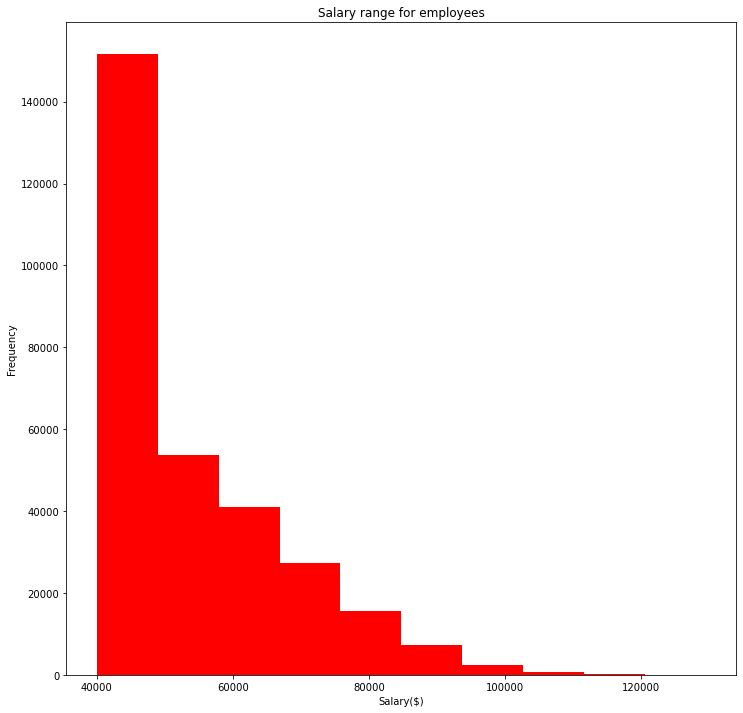

In [33]:
#histogram to visualize the most common salary ranges for employees.
fig, ax=plt.subplots(figsize=(12,12))
df_1['Salary'].plot(kind='hist', color='r',ax=ax)
ax.set(xlabel='Salary($)', title='Salary range for employees')
plt.show()

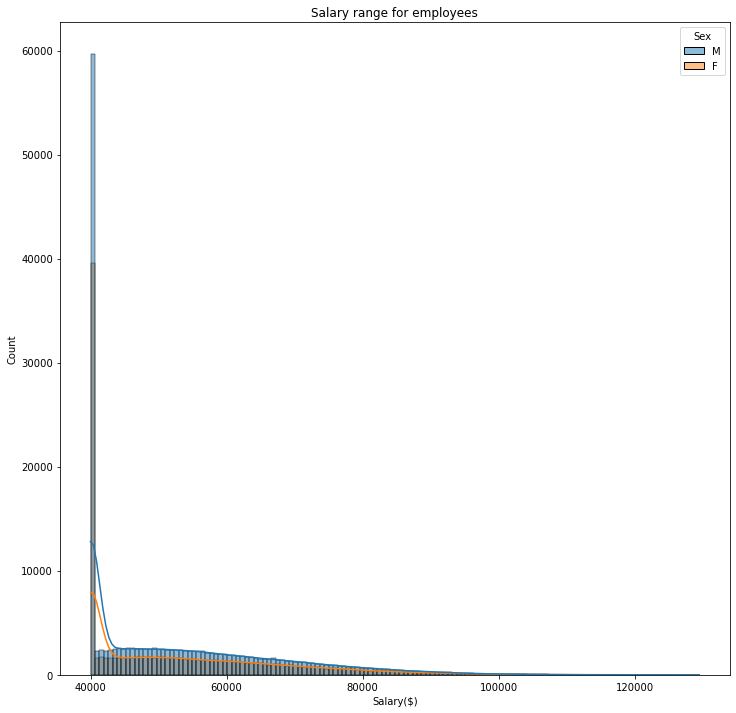

In [34]:
#histogram to visualize the most common salary ranges for employees
fig, ax=plt.subplots(figsize=(12,12))
sns.histplot(x='Salary', data=df_1,kde=True,hue="Sex", ax=ax)
ax.set(xlabel='Salary($)', title='Salary range for employees')
plt.show()

### Most common lastname

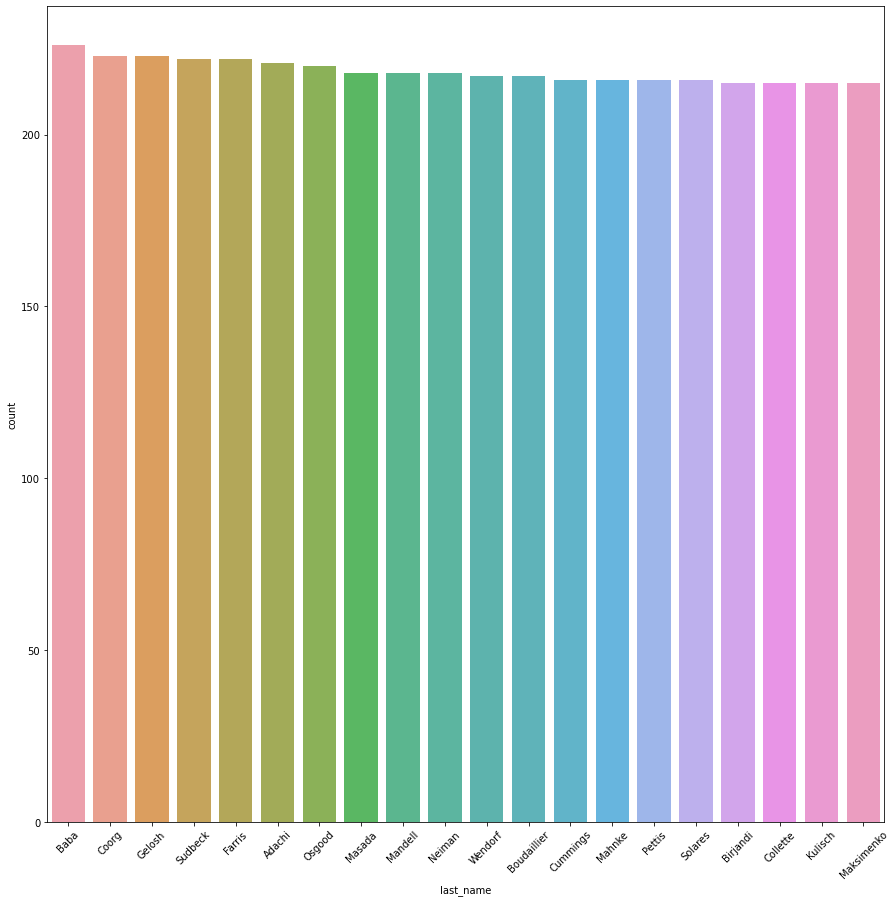

In [35]:
most_common_lastname=df_8.nlargest(20, 'count')
fig, ax=plt.subplots(figsize=(15,15))
sns.barplot(x='last_name', y='count',
            data=most_common_lastname, alpha=0.9,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

### Bar chart of average salary by title.

In [37]:
#Create a bar chart of average salary by title.
sql_9='''SELECT e.emp_no, e.last_name, e.first_name, t.title, s.salary
        FROM employees AS e
        JOIN salaries AS s
        ON e.emp_no=s.emp_no
        JOIN titles AS t
        ON e.emp_title_id=t.title_id'''
results_9=connection.execute(db.text(sql_9)).fetchall()
df_9 = pd.DataFrame(results_9, columns=(['emp_no','last_name',
                                         'first_name', 'title', 'salary']))
df_9

,emp_no,last_name,first_name,title,salary
0,10005,Maliniak,Kyoichi,Staff,78228
1,10010,Piveteau,Duangkaew,Engineer,72488
2,10011,Sluis,Mary,Staff,42365
3,10013,Terkki,Eberhardt,Senior Staff,40000
4,10017,Bouloucos,Cristinel,Staff,71380
...,...,...,...,...,...
300019,499948,Paludetto,Cordelia,Engineer,40000
300020,499972,Leuchs,Katsuo,Senior Engineer,41002
300021,499985,Lukaszewicz,Gila,Staff,40000
300022,499987,Dusink,Rimli,Staff,52282


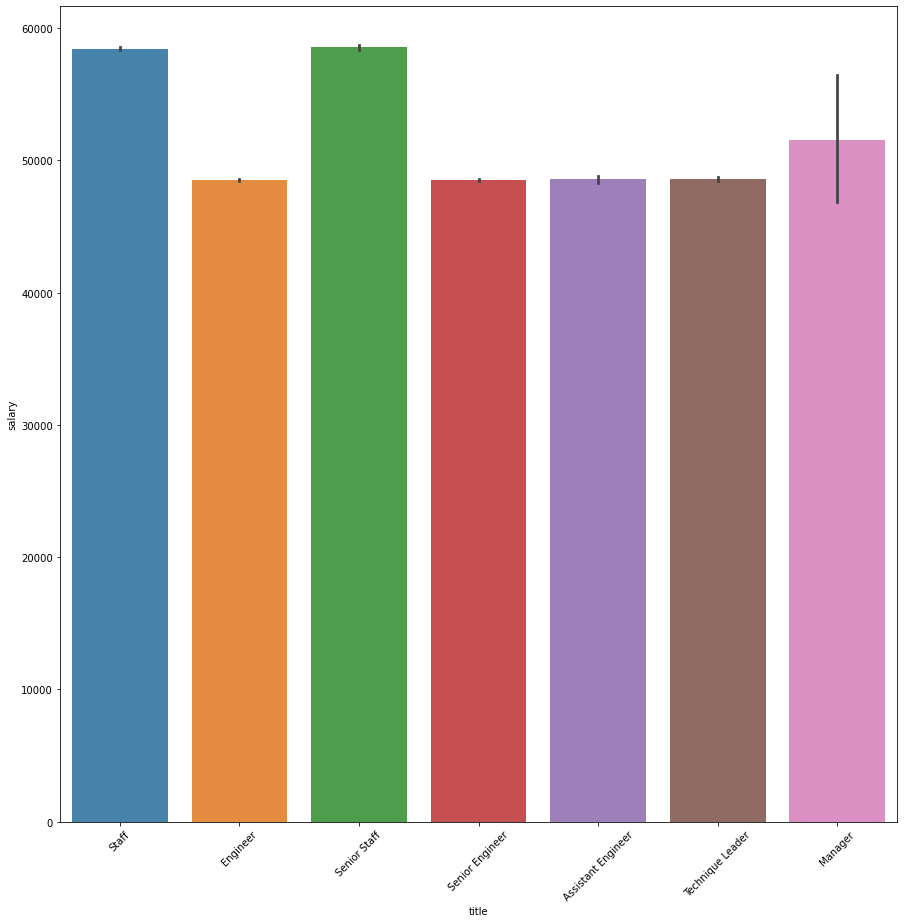

In [38]:
fig, ax=plt.subplots(figsize=(15,15))
sns.barplot(x='title', y='salary',
            data=df_9, alpha=0.9,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

## Bar and pie plots for Departments

In [70]:
dep=pd.DataFrame(df_4.groupby('dept_name')['emp_no'].count())
dep.columns=['Total employees']

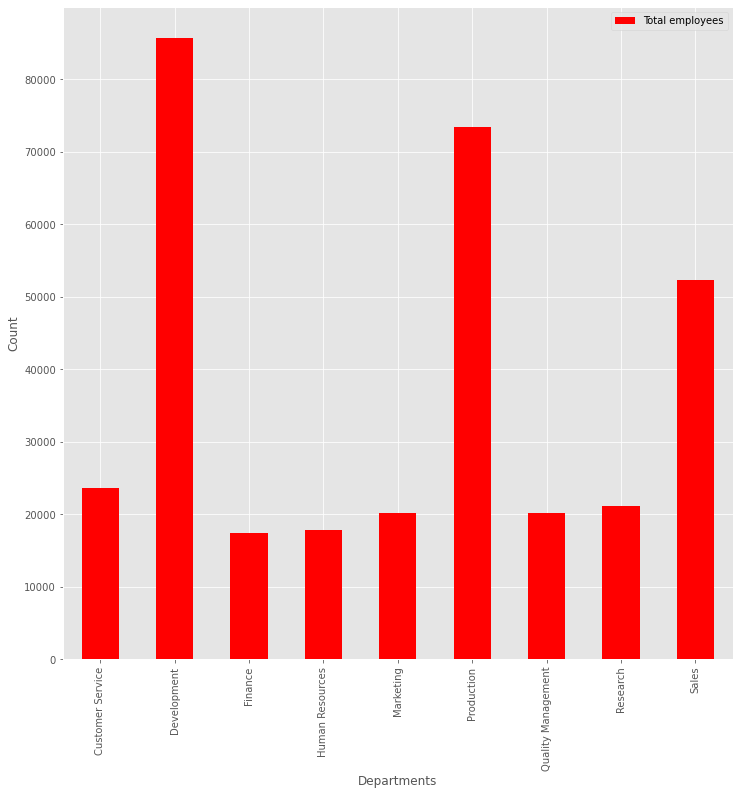

In [71]:
fig,ax=plt.subplots(figsize=(12,12))
dep.plot(kind='bar', color='r',ax=ax)
ax.set(xlabel='Departments', ylabel='Count')
ax.legend()
plt.show()

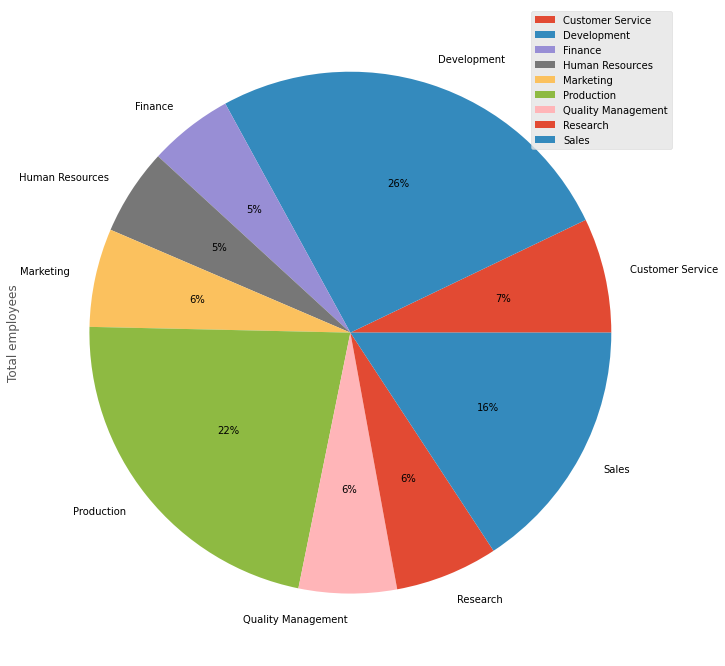

In [74]:
plt.style.use('ggplot')
fig,ax=plt.subplots(figsize=(12,12))
dep.plot(kind='pie', y='Total employees',autopct='%1.0f%%', ax=ax)
plt.show()